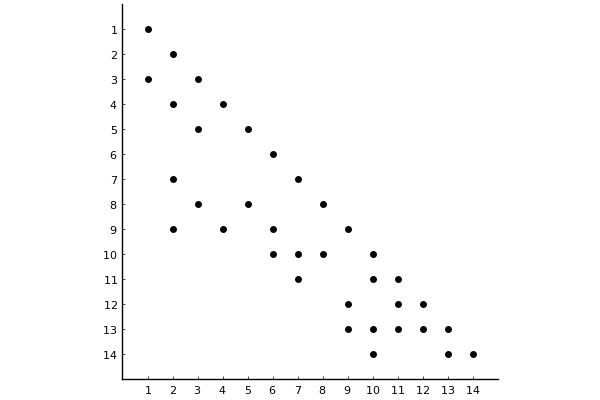

In [1]:
using SparseArrays
using Plots
using MatrixMarket

# Read the matrix data
file_name = "reach_example.mtx"
L = MatrixMarket.mmread(file_name)

pyplot()
n = L.m # Size of matrix
plot(spy(L), xaxis=((0,n+1), 1:n), yaxis=((0,n+1), 1:n), 
    markersize = 5, clims = (1,2))

In [2]:
"""
dfs: depth-first search construction of the reach. The ordering
of the nodes is important for correctness of the lower triangular solve.

input j: index of node for which reach is computed
input/output xi: reach set of node
input/output top: pointer that locates where the data
                  is stored in xi.
input/output w: used to mark nodes already visited
input Lp: indexing array of L
input Li: row index array for L
"""
function dfs(j, xi, top, w, Lp, Li)
    # Mark the current node
    w[j] = true

    # Loop over non-zero entries in column j of L
    for k=Lp[j]:Lp[j+1]-1
        if !w[Li[k]] # Skip node that was marked
            xi, top, w = dfs(Li[k], xi, top, w, Lp, Li)
            # Call dfs recursively for all nodes in column j
        end
    end

    # Insert j before all nodes inserted so far
    xi[top] = j
    # Move top one position up
    top = top-1

    return xi, top, w
end

dfs

In [3]:
n = L.m # Size of matrix

# Starting node
node = 6
@assert node>=1
@assert node<=n

top = n

xi = zeros(Int64,n)
w  = fill(false,n) # Flag whether a node was visited or not
xi, top, w = dfs(node, xi, top, w, L.colptr, L.rowval)
xi = xi[top+1:end] # Keeping only the relevant data

println("Reach of node ", node)
println(xi)

Reach of node 6
[6, 10, 11, 9, 12, 13, 14]


In [4]:
top = n
xi = zeros(Int64,n)
w  = fill(false,n) # Flag whether a node was visited or not
xi, top, w = dfs(4, xi, top, w, L.colptr, L.rowval)
xi, top, w = dfs(6, xi, top, w, L.colptr, L.rowval)
xi = xi[top+1:end] # Keeping only the relevant data
println(xi)

[6, 10, 11, 4, 9, 12, 13, 14]
